In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'WESTERN GREECE']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Greece/Western Greece/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 1915.45476 | Val Loss: 4418.51373 | Train Acc: 26.340| Val Acc: 31.189
Epoch 002: | Train Loss: 1894.13987 | Val Loss: 4381.27191 | Train Acc: 26.116| Val Acc: 30.795
Epoch 003: | Train Loss: 1861.35991 | Val Loss: 4333.62750 | Train Acc: 25.810| Val Acc: 30.346
Epoch 004: | Train Loss: 1825.18200 | Val Loss: 4288.23010 | Train Acc: 25.536| Val Acc: 29.895
Epoch 005: | Train Loss: 1790.66430 | Val Loss: 4238.40503 | Train Acc: 25.228| Val Acc: 29.473
Epoch 006: | Train Loss: 1754.88369 | Val Loss: 4181.76550 | Train Acc: 25.035| Val Acc: 29.074
Epoch 007: | Train Loss: 1712.19060 | Val Loss: 4135.18924 | Train Acc: 24.780| Val Acc: 28.820
Epoch 008: | Train Loss: 1679.52206 | Val Loss: 4126.06616 | Train Acc: 24.598| Val Acc: 28.951
Epoch 009: | Train Loss: 1644.73591 | Val Loss: 4081.47455 | Train Acc: 24.373| Val Acc: 28.709
Epoch 010: | Train Loss: 1598.27924 | Val Loss: 4065.06921 | Train Acc: 24.077| Val Acc: 28.578
Epoch 011: | Train Loss: 1572.13551 | Va

Epoch 087: | Train Loss: 356.84760 | Val Loss: 2712.96356 | Train Acc: 12.898| Val Acc: 26.588
Epoch 088: | Train Loss: 349.48393 | Val Loss: 2764.53934 | Train Acc: 12.735| Val Acc: 27.008
Epoch 089: | Train Loss: 360.59961 | Val Loss: 2749.95218 | Train Acc: 12.881| Val Acc: 26.998
Epoch 090: | Train Loss: 311.86431 | Val Loss: 2726.09943 | Train Acc: 12.196| Val Acc: 27.043
Epoch 091: | Train Loss: 300.74536 | Val Loss: 2777.47943 | Train Acc: 12.063| Val Acc: 27.176
Epoch 092: | Train Loss: 340.55239 | Val Loss: 2747.13998 | Train Acc: 12.765| Val Acc: 26.758
Epoch 093: | Train Loss: 334.43805 | Val Loss: 2874.16882 | Train Acc: 12.485| Val Acc: 28.092
Epoch 094: | Train Loss: 341.32477 | Val Loss: 2766.33057 | Train Acc: 12.629| Val Acc: 27.248
Epoch 095: | Train Loss: 332.74644 | Val Loss: 2759.42386 | Train Acc: 12.510| Val Acc: 26.566
Epoch 096: | Train Loss: 326.73815 | Val Loss: 2796.62399 | Train Acc: 12.481| Val Acc: 27.375
Epoch 097: | Train Loss: 327.17272 | Val Loss: 288

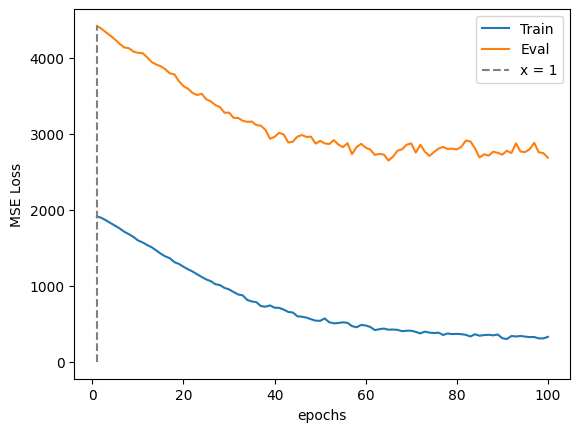

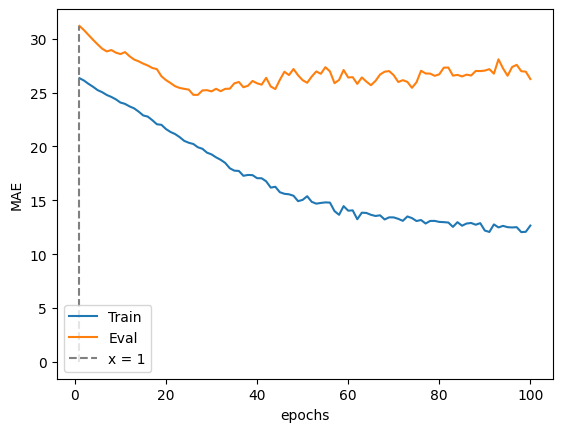

MAE on train set:  10.31184128952263
min prediction: 3
max prediction: 146

MAE on test set:  26.150510204081634
Error <= 30: 75.26 %
min prediction: 4
max prediction: 143


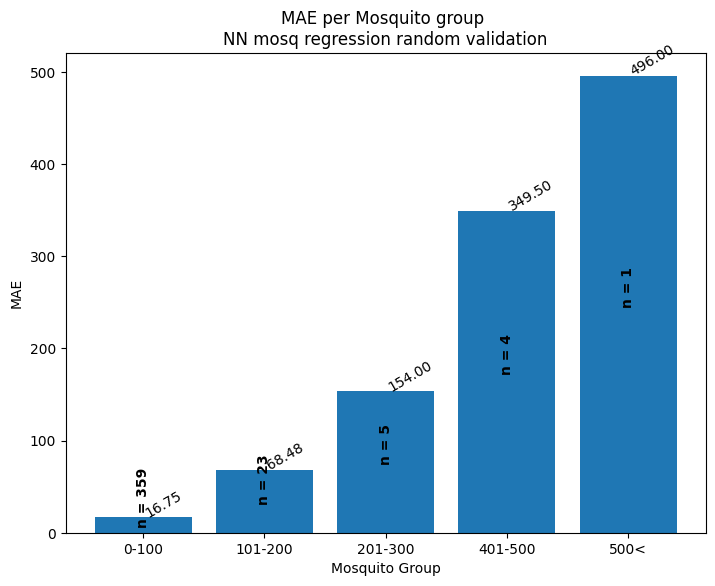

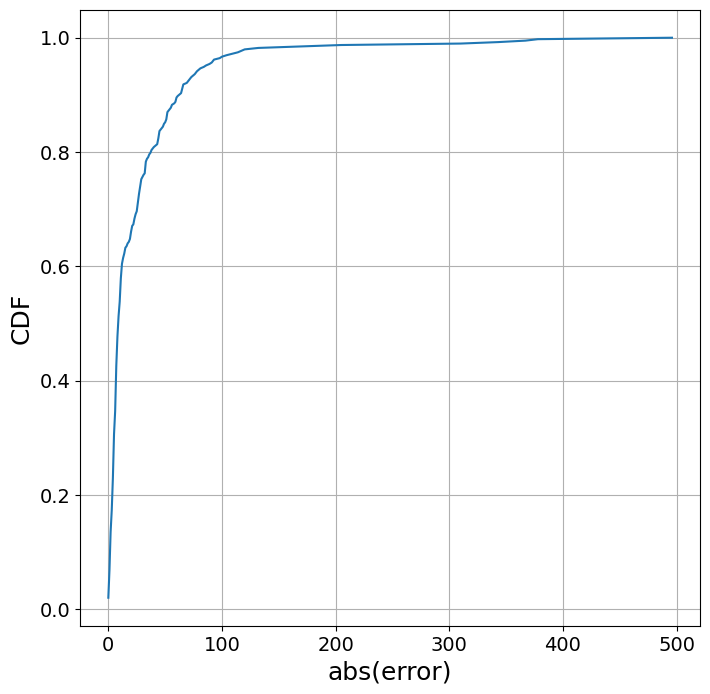

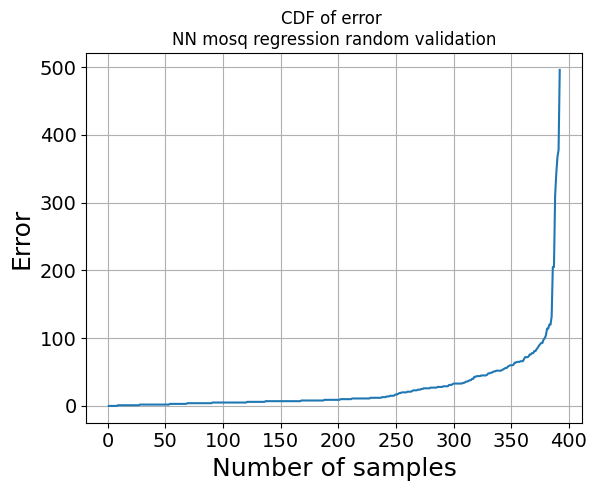

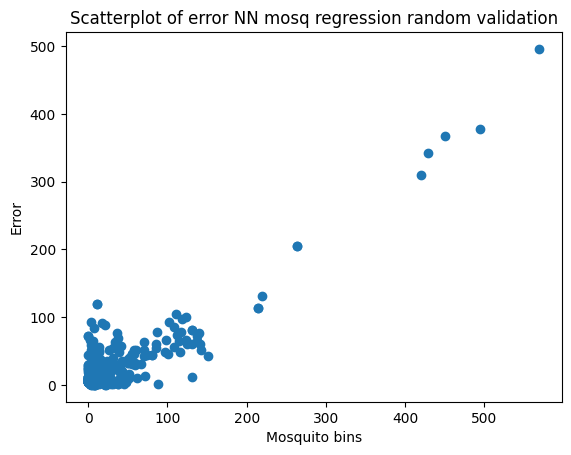

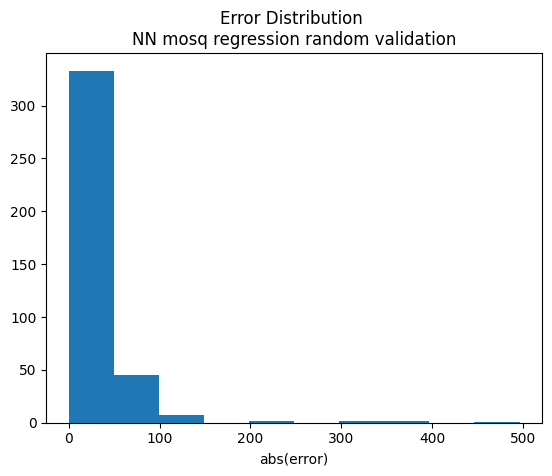

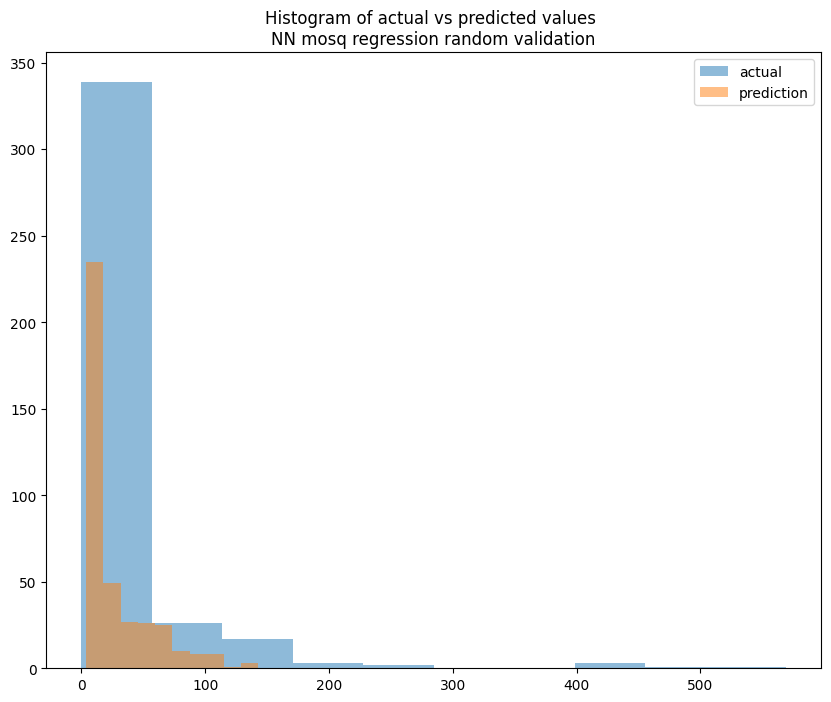

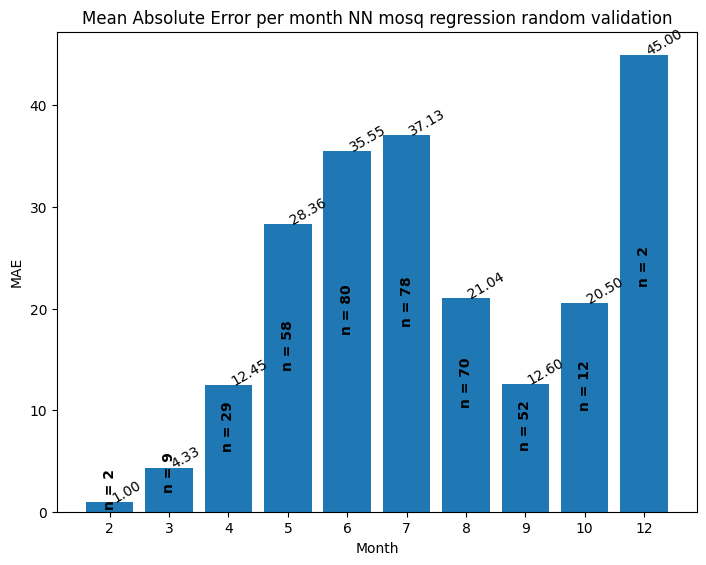

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 1921.94252 | Val Loss: 2727.98706 | Train Acc: 26.223| Val Acc: 28.154
Epoch 002: | Train Loss: 1895.45929 | Val Loss: 2700.49390 | Train Acc: 25.973| Val Acc: 27.891
Epoch 003: | Train Loss: 1858.45142 | Val Loss: 2650.88818 | Train Acc: 25.623| Val Acc: 27.417
Epoch 004: | Train Loss: 1819.80260 | Val Loss: 2586.78308 | Train Acc: 25.304| Val Acc: 26.874
Epoch 005: | Train Loss: 1774.66950 | Val Loss: 2519.12097 | Train Acc: 24.964| Val Acc: 26.324
Epoch 006: | Train Loss: 1743.78738 | Val Loss: 2467.60278 | Train Acc: 24.741| Val Acc: 25.960
Epoch 007: | Train Loss: 1700.38371 | Val Loss: 2430.37561 | Train Acc: 24.465| Val Acc: 25.922
Epoch 008: | Train Loss: 1659.21442 | Val Loss: 2402.08630 | Train Acc: 24.259| Val Acc: 25.909
Epoch 009: | Train Loss: 1629.16377 | Val Loss: 2374.07178 | Train Acc: 24.126| Val Acc: 25.768
Epoch 010: | Train Loss: 1585.85559 | Val Loss: 2354.75458 | Train Acc: 23.810| Val Acc: 25.727
Epoch 011: | Train Loss: 1556.50684 | Va

Epoch 087: | Train Loss: 345.03482 | Val Loss: 1407.94666 | Train Acc: 12.506| Val Acc: 21.569
Epoch 088: | Train Loss: 328.51363 | Val Loss: 1440.58258 | Train Acc: 12.403| Val Acc: 22.043
Epoch 089: | Train Loss: 338.17851 | Val Loss: 1451.17883 | Train Acc: 12.547| Val Acc: 22.338
Epoch 090: | Train Loss: 342.73387 | Val Loss: 1454.69690 | Train Acc: 12.475| Val Acc: 22.398
Epoch 091: | Train Loss: 324.71866 | Val Loss: 1406.48035 | Train Acc: 12.306| Val Acc: 21.819
Epoch 092: | Train Loss: 352.50499 | Val Loss: 1500.70953 | Train Acc: 12.764| Val Acc: 22.321
Epoch 093: | Train Loss: 332.43281 | Val Loss: 1484.05579 | Train Acc: 12.539| Val Acc: 21.990
Epoch 094: | Train Loss: 344.66675 | Val Loss: 1457.74097 | Train Acc: 12.704| Val Acc: 21.817
Epoch 095: | Train Loss: 321.22244 | Val Loss: 1451.57166 | Train Acc: 12.174| Val Acc: 22.243
Epoch 096: | Train Loss: 312.11835 | Val Loss: 1476.12634 | Train Acc: 12.168| Val Acc: 22.615
Epoch 097: | Train Loss: 331.78503 | Val Loss: 150

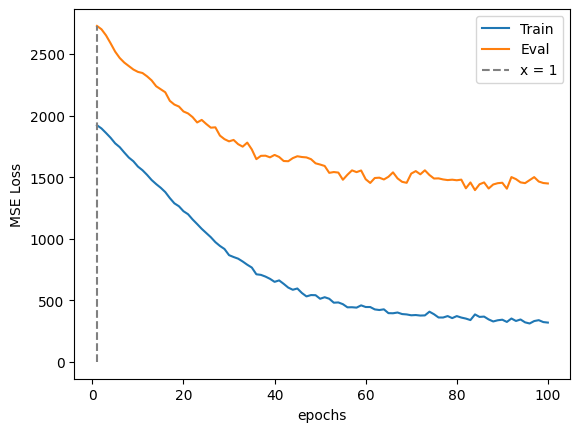

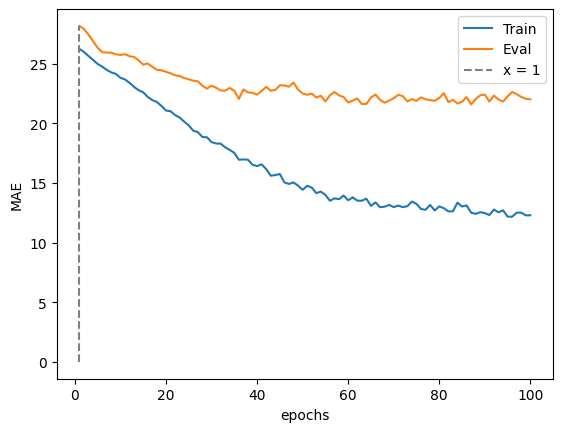

Epoch 001: | Train Loss: 1948.04688 | Val Loss: 3773.05664 | Train Acc: 26.432| Val Acc: 27.183
Epoch 002: | Train Loss: 1919.89645 | Val Loss: 3729.42554 | Train Acc: 26.144| Val Acc: 26.738
Epoch 003: | Train Loss: 1890.17259 | Val Loss: 3679.36511 | Train Acc: 25.854| Val Acc: 26.279
Epoch 004: | Train Loss: 1852.17681 | Val Loss: 3619.51416 | Train Acc: 25.520| Val Acc: 25.849
Epoch 005: | Train Loss: 1813.46216 | Val Loss: 3560.20740 | Train Acc: 25.234| Val Acc: 25.381
Epoch 006: | Train Loss: 1776.29724 | Val Loss: 3508.93396 | Train Acc: 24.992| Val Acc: 25.103
Epoch 007: | Train Loss: 1732.93252 | Val Loss: 3476.44604 | Train Acc: 24.692| Val Acc: 25.136
Epoch 008: | Train Loss: 1690.31137 | Val Loss: 3454.78992 | Train Acc: 24.471| Val Acc: 25.208
Epoch 009: | Train Loss: 1660.88005 | Val Loss: 3414.92590 | Train Acc: 24.318| Val Acc: 25.185
Epoch 010: | Train Loss: 1624.51406 | Val Loss: 3385.31128 | Train Acc: 24.126| Val Acc: 25.093
Epoch 011: | Train Loss: 1585.13930 | Va

Epoch 087: | Train Loss: 336.04885 | Val Loss: 2191.40759 | Train Acc: 12.783| Val Acc: 23.195
Epoch 088: | Train Loss: 351.62106 | Val Loss: 2135.85577 | Train Acc: 12.883| Val Acc: 22.789
Epoch 089: | Train Loss: 341.03182 | Val Loss: 2140.14105 | Train Acc: 12.721| Val Acc: 22.911
Epoch 090: | Train Loss: 349.92254 | Val Loss: 2192.40485 | Train Acc: 12.872| Val Acc: 23.315
Epoch 091: | Train Loss: 335.31827 | Val Loss: 2179.27271 | Train Acc: 12.718| Val Acc: 23.089
Epoch 092: | Train Loss: 367.52004 | Val Loss: 2192.52405 | Train Acc: 13.297| Val Acc: 23.214
Epoch 093: | Train Loss: 354.60848 | Val Loss: 2200.28687 | Train Acc: 12.998| Val Acc: 23.111
Epoch 094: | Train Loss: 323.24797 | Val Loss: 2161.51514 | Train Acc: 12.575| Val Acc: 22.788
Epoch 095: | Train Loss: 347.88174 | Val Loss: 2175.83313 | Train Acc: 12.837| Val Acc: 23.089
Epoch 096: | Train Loss: 367.37038 | Val Loss: 2279.01819 | Train Acc: 13.102| Val Acc: 23.336
Epoch 097: | Train Loss: 341.51657 | Val Loss: 219

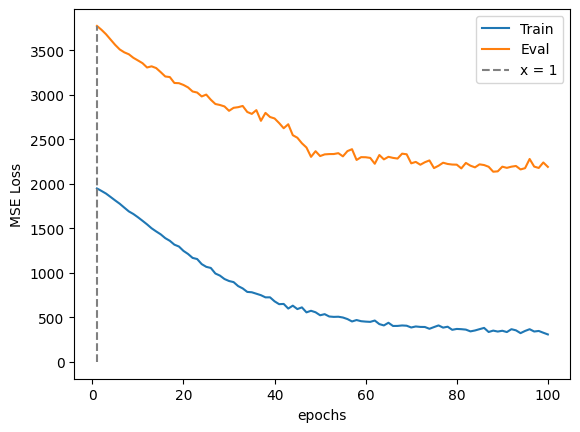

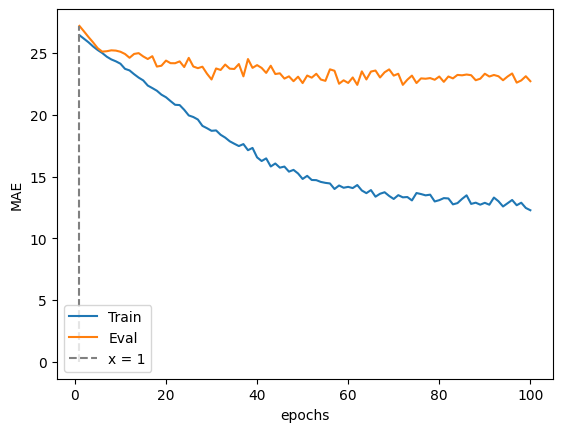

Epoch 001: | Train Loss: 1876.03429 | Val Loss: 68899.81738 | Train Acc: 25.969| Val Acc: 52.822
Epoch 002: | Train Loss: 1851.81069 | Val Loss: 68849.35596 | Train Acc: 25.727| Val Acc: 52.512
Epoch 003: | Train Loss: 1821.81910 | Val Loss: 68778.73145 | Train Acc: 25.408| Val Acc: 51.995
Epoch 004: | Train Loss: 1781.73772 | Val Loss: 68678.42944 | Train Acc: 25.104| Val Acc: 51.543
Epoch 005: | Train Loss: 1742.80056 | Val Loss: 68592.84473 | Train Acc: 24.771| Val Acc: 51.139
Epoch 006: | Train Loss: 1710.82629 | Val Loss: 68530.37061 | Train Acc: 24.577| Val Acc: 50.835
Epoch 007: | Train Loss: 1671.53962 | Val Loss: 68480.80249 | Train Acc: 24.289| Val Acc: 50.674
Epoch 008: | Train Loss: 1631.20184 | Val Loss: 68461.16235 | Train Acc: 24.082| Val Acc: 50.595
Epoch 009: | Train Loss: 1597.48651 | Val Loss: 68407.85571 | Train Acc: 23.838| Val Acc: 50.407
Epoch 010: | Train Loss: 1565.10187 | Val Loss: 68361.27759 | Train Acc: 23.669| Val Acc: 50.289
Epoch 011: | Train Loss: 1528.

Epoch 087: | Train Loss: 344.85309 | Val Loss: 66348.40674 | Train Acc: 12.580| Val Acc: 46.873
Epoch 088: | Train Loss: 338.45742 | Val Loss: 66042.90186 | Train Acc: 12.737| Val Acc: 46.701
Epoch 089: | Train Loss: 353.51986 | Val Loss: 66086.33740 | Train Acc: 12.936| Val Acc: 46.639
Epoch 090: | Train Loss: 339.27414 | Val Loss: 66091.03931 | Train Acc: 12.539| Val Acc: 46.476
Epoch 091: | Train Loss: 350.02625 | Val Loss: 66193.27539 | Train Acc: 12.741| Val Acc: 46.325
Epoch 092: | Train Loss: 338.87339 | Val Loss: 66221.86548 | Train Acc: 12.634| Val Acc: 46.053
Epoch 093: | Train Loss: 325.54332 | Val Loss: 66327.22559 | Train Acc: 12.469| Val Acc: 46.340
Epoch 094: | Train Loss: 337.16595 | Val Loss: 65974.98413 | Train Acc: 12.821| Val Acc: 46.233
Epoch 095: | Train Loss: 304.21800 | Val Loss: 66009.40405 | Train Acc: 12.088| Val Acc: 46.050
Epoch 096: | Train Loss: 350.73040 | Val Loss: 66128.85229 | Train Acc: 12.856| Val Acc: 45.839
Epoch 097: | Train Loss: 309.63458 | Val

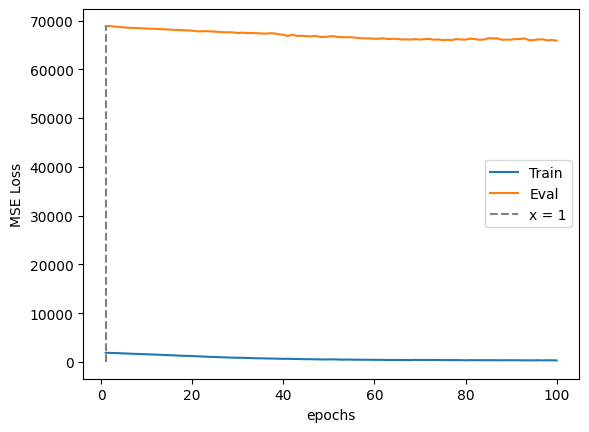

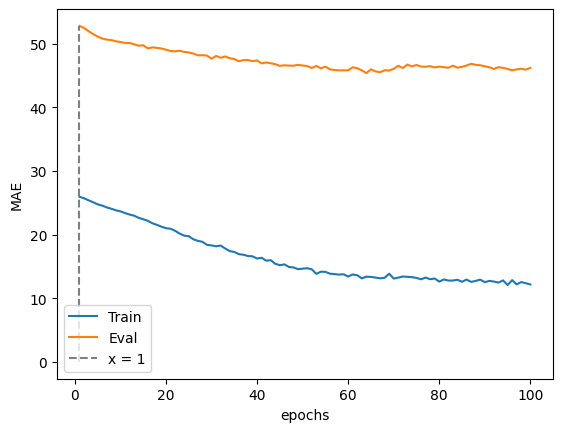

Epoch 001: | Train Loss: 1909.17320 | Val Loss: 7023.17920 | Train Acc: 26.054| Val Acc: 34.909
Epoch 002: | Train Loss: 1883.63857 | Val Loss: 6973.12976 | Train Acc: 25.785| Val Acc: 34.649
Epoch 003: | Train Loss: 1852.81209 | Val Loss: 6891.05872 | Train Acc: 25.492| Val Acc: 34.200
Epoch 004: | Train Loss: 1811.18992 | Val Loss: 6791.82068 | Train Acc: 25.124| Val Acc: 33.740
Epoch 005: | Train Loss: 1772.71661 | Val Loss: 6691.46448 | Train Acc: 24.823| Val Acc: 33.330
Epoch 006: | Train Loss: 1725.64099 | Val Loss: 6588.70520 | Train Acc: 24.506| Val Acc: 32.979
Epoch 007: | Train Loss: 1696.41292 | Val Loss: 6485.49243 | Train Acc: 24.334| Val Acc: 32.724
Epoch 008: | Train Loss: 1653.66546 | Val Loss: 6425.02820 | Train Acc: 24.130| Val Acc: 32.614
Epoch 009: | Train Loss: 1609.56933 | Val Loss: 6335.09924 | Train Acc: 23.808| Val Acc: 32.264
Epoch 010: | Train Loss: 1573.95609 | Val Loss: 6339.46545 | Train Acc: 23.659| Val Acc: 32.347
Epoch 011: | Train Loss: 1536.07438 | Va

Epoch 087: | Train Loss: 372.07041 | Val Loss: 4431.10028 | Train Acc: 13.135| Val Acc: 28.635
Epoch 088: | Train Loss: 350.26249 | Val Loss: 4489.14282 | Train Acc: 12.880| Val Acc: 28.925
Epoch 089: | Train Loss: 353.88408 | Val Loss: 4465.93250 | Train Acc: 12.906| Val Acc: 28.960
Epoch 090: | Train Loss: 312.72497 | Val Loss: 4508.81592 | Train Acc: 12.080| Val Acc: 28.808
Epoch 091: | Train Loss: 343.55395 | Val Loss: 4432.95380 | Train Acc: 12.585| Val Acc: 28.641
Epoch 092: | Train Loss: 334.01140 | Val Loss: 4430.40845 | Train Acc: 12.542| Val Acc: 28.383
Epoch 093: | Train Loss: 326.34746 | Val Loss: 4427.22284 | Train Acc: 12.604| Val Acc: 28.869
Epoch 094: | Train Loss: 335.47725 | Val Loss: 4437.32825 | Train Acc: 12.598| Val Acc: 28.905
Epoch 095: | Train Loss: 322.54495 | Val Loss: 4430.88702 | Train Acc: 12.407| Val Acc: 28.762
Epoch 096: | Train Loss: 323.25092 | Val Loss: 4391.07013 | Train Acc: 12.383| Val Acc: 28.796
Epoch 097: | Train Loss: 322.99006 | Val Loss: 438

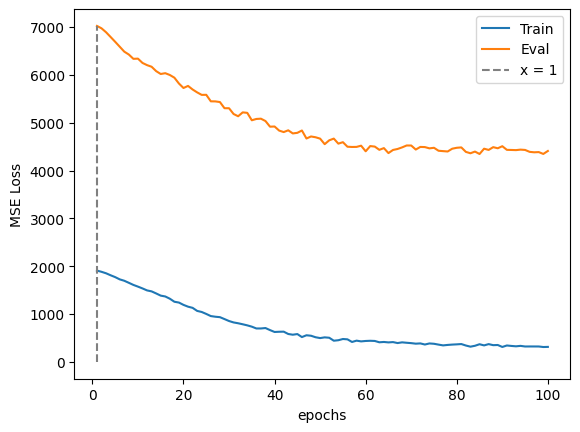

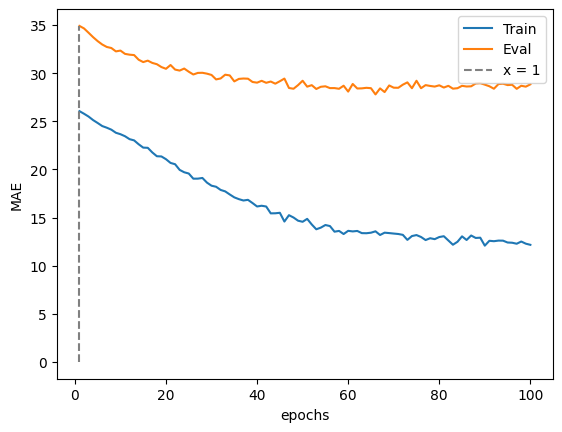

Epoch 001: | Train Loss: 1906.31520 | Val Loss: 11146.29163 | Train Acc: 26.194| Val Acc: 38.760
Epoch 002: | Train Loss: 1886.34715 | Val Loss: 11094.17871 | Train Acc: 25.982| Val Acc: 38.432
Epoch 003: | Train Loss: 1848.72834 | Val Loss: 11007.15405 | Train Acc: 25.643| Val Acc: 37.886
Epoch 004: | Train Loss: 1807.71402 | Val Loss: 10903.19141 | Train Acc: 25.259| Val Acc: 37.300
Epoch 005: | Train Loss: 1772.26854 | Val Loss: 10795.16797 | Train Acc: 25.007| Val Acc: 36.798
Epoch 006: | Train Loss: 1730.77182 | Val Loss: 10699.70630 | Train Acc: 24.723| Val Acc: 36.447
Epoch 007: | Train Loss: 1692.35617 | Val Loss: 10619.42017 | Train Acc: 24.516| Val Acc: 36.240
Epoch 008: | Train Loss: 1655.72029 | Val Loss: 10541.73657 | Train Acc: 24.249| Val Acc: 35.963
Epoch 009: | Train Loss: 1622.22184 | Val Loss: 10440.24268 | Train Acc: 24.149| Val Acc: 35.702
Epoch 010: | Train Loss: 1597.18427 | Val Loss: 10431.89978 | Train Acc: 23.930| Val Acc: 35.944
Epoch 011: | Train Loss: 1552.

Epoch 087: | Train Loss: 326.34145 | Val Loss: 7894.02820 | Train Acc: 12.613| Val Acc: 31.830
Epoch 088: | Train Loss: 342.65877 | Val Loss: 7984.27466 | Train Acc: 12.749| Val Acc: 31.704
Epoch 089: | Train Loss: 355.97597 | Val Loss: 7925.40698 | Train Acc: 12.961| Val Acc: 31.302
Epoch 090: | Train Loss: 347.85703 | Val Loss: 8005.27747 | Train Acc: 12.848| Val Acc: 31.653
Epoch 091: | Train Loss: 356.89284 | Val Loss: 7832.90234 | Train Acc: 12.952| Val Acc: 31.523
Epoch 092: | Train Loss: 335.62238 | Val Loss: 7924.55225 | Train Acc: 12.687| Val Acc: 31.393
Epoch 093: | Train Loss: 346.00856 | Val Loss: 7897.85156 | Train Acc: 12.694| Val Acc: 31.452
Epoch 094: | Train Loss: 339.78288 | Val Loss: 7885.10449 | Train Acc: 12.571| Val Acc: 31.664
Epoch 095: | Train Loss: 320.44913 | Val Loss: 7970.12402 | Train Acc: 12.280| Val Acc: 32.178
Epoch 096: | Train Loss: 339.36176 | Val Loss: 7949.44824 | Train Acc: 12.634| Val Acc: 31.882
Epoch 097: | Train Loss: 329.31281 | Val Loss: 787

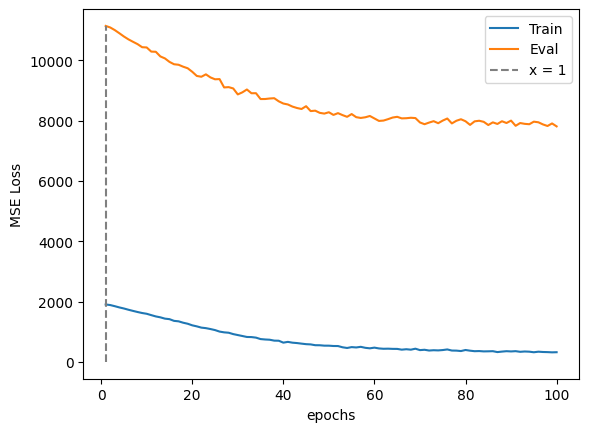

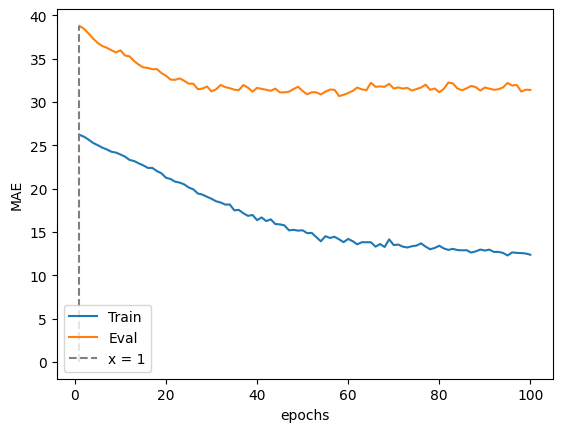

Epoch 001: | Train Loss: 1905.37272 | Val Loss: 3504.57251 | Train Acc: 26.130| Val Acc: 29.287
Epoch 002: | Train Loss: 1884.08136 | Val Loss: 3462.73633 | Train Acc: 25.915| Val Acc: 28.854
Epoch 003: | Train Loss: 1843.52730 | Val Loss: 3396.35547 | Train Acc: 25.565| Val Acc: 28.193
Epoch 004: | Train Loss: 1804.46660 | Val Loss: 3319.65552 | Train Acc: 25.223| Val Acc: 27.604
Epoch 005: | Train Loss: 1764.86152 | Val Loss: 3248.52783 | Train Acc: 24.933| Val Acc: 27.227
Epoch 006: | Train Loss: 1718.36555 | Val Loss: 3185.05969 | Train Acc: 24.649| Val Acc: 27.015
Epoch 007: | Train Loss: 1694.82800 | Val Loss: 3131.98413 | Train Acc: 24.489| Val Acc: 26.747
Epoch 008: | Train Loss: 1651.37896 | Val Loss: 3077.49963 | Train Acc: 24.187| Val Acc: 26.514
Epoch 009: | Train Loss: 1618.50301 | Val Loss: 3020.82031 | Train Acc: 24.017| Val Acc: 26.306
Epoch 010: | Train Loss: 1582.99079 | Val Loss: 2969.48193 | Train Acc: 23.724| Val Acc: 26.057
Epoch 011: | Train Loss: 1546.17762 | Va

Epoch 087: | Train Loss: 338.34363 | Val Loss: 1994.52307 | Train Acc: 12.538| Val Acc: 23.555
Epoch 088: | Train Loss: 360.08504 | Val Loss: 2016.99609 | Train Acc: 13.048| Val Acc: 23.616
Epoch 089: | Train Loss: 351.24064 | Val Loss: 2016.57239 | Train Acc: 12.956| Val Acc: 23.926
Epoch 090: | Train Loss: 365.68509 | Val Loss: 1974.96680 | Train Acc: 13.041| Val Acc: 22.691
Epoch 091: | Train Loss: 336.72299 | Val Loss: 1915.32623 | Train Acc: 12.783| Val Acc: 22.951
Epoch 092: | Train Loss: 347.79785 | Val Loss: 1908.16589 | Train Acc: 12.861| Val Acc: 22.929
Epoch 093: | Train Loss: 347.64879 | Val Loss: 1855.98340 | Train Acc: 12.722| Val Acc: 22.837
Epoch 094: | Train Loss: 335.11527 | Val Loss: 1940.61621 | Train Acc: 12.611| Val Acc: 22.665
Epoch 095: | Train Loss: 349.79843 | Val Loss: 2009.77850 | Train Acc: 12.866| Val Acc: 23.302
Epoch 096: | Train Loss: 348.51739 | Val Loss: 1932.72681 | Train Acc: 12.787| Val Acc: 22.920
Epoch 097: | Train Loss: 363.28094 | Val Loss: 198

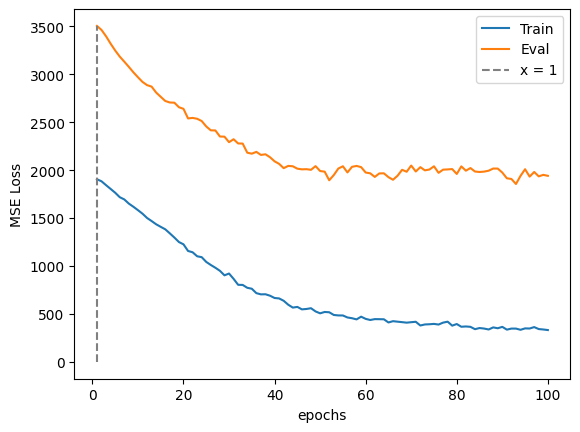

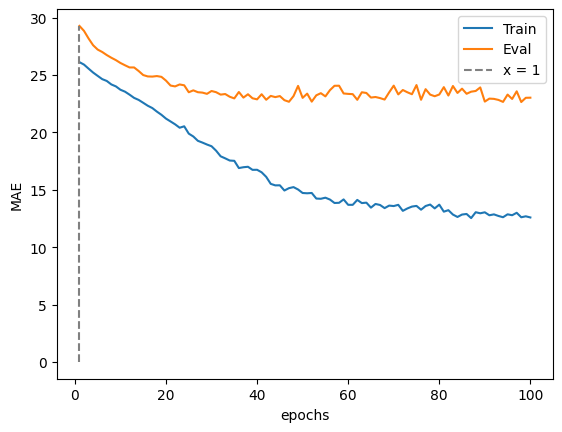

Epoch 001: | Train Loss: 1862.94592 | Val Loss: 3022.18066 | Train Acc: 25.936| Val Acc: 30.037
Epoch 002: | Train Loss: 1835.55607 | Val Loss: 2982.18103 | Train Acc: 25.639| Val Acc: 29.657
Epoch 003: | Train Loss: 1807.27591 | Val Loss: 2912.60693 | Train Acc: 25.330| Val Acc: 29.139
Epoch 004: | Train Loss: 1766.56456 | Val Loss: 2835.46594 | Train Acc: 25.014| Val Acc: 28.595
Epoch 005: | Train Loss: 1732.13378 | Val Loss: 2772.66907 | Train Acc: 24.702| Val Acc: 28.202
Epoch 006: | Train Loss: 1687.77508 | Val Loss: 2717.62061 | Train Acc: 24.440| Val Acc: 27.909
Epoch 007: | Train Loss: 1652.21686 | Val Loss: 2659.49768 | Train Acc: 24.250| Val Acc: 27.624
Epoch 008: | Train Loss: 1616.15091 | Val Loss: 2618.99622 | Train Acc: 24.001| Val Acc: 27.397
Epoch 009: | Train Loss: 1575.86485 | Val Loss: 2582.73340 | Train Acc: 23.805| Val Acc: 27.222
Epoch 010: | Train Loss: 1542.93791 | Val Loss: 2559.97705 | Train Acc: 23.520| Val Acc: 27.121
Epoch 011: | Train Loss: 1517.21260 | Va

Epoch 087: | Train Loss: 334.36408 | Val Loss: 1538.69946 | Train Acc: 12.469| Val Acc: 22.607
Epoch 088: | Train Loss: 316.59365 | Val Loss: 1610.23376 | Train Acc: 12.370| Val Acc: 23.344
Epoch 089: | Train Loss: 354.59659 | Val Loss: 1649.64691 | Train Acc: 12.946| Val Acc: 23.214
Epoch 090: | Train Loss: 326.45503 | Val Loss: 1575.32458 | Train Acc: 12.440| Val Acc: 22.684
Epoch 091: | Train Loss: 340.07103 | Val Loss: 1556.65686 | Train Acc: 12.608| Val Acc: 22.289
Epoch 092: | Train Loss: 329.09332 | Val Loss: 1596.26959 | Train Acc: 12.395| Val Acc: 22.730
Epoch 093: | Train Loss: 326.88139 | Val Loss: 1598.12994 | Train Acc: 12.273| Val Acc: 22.837
Epoch 094: | Train Loss: 328.53867 | Val Loss: 1610.58862 | Train Acc: 12.370| Val Acc: 22.809
Epoch 095: | Train Loss: 367.33549 | Val Loss: 1576.06140 | Train Acc: 13.131| Val Acc: 22.607
Epoch 096: | Train Loss: 350.50146 | Val Loss: 1598.21161 | Train Acc: 12.674| Val Acc: 22.810
Epoch 097: | Train Loss: 304.51498 | Val Loss: 156

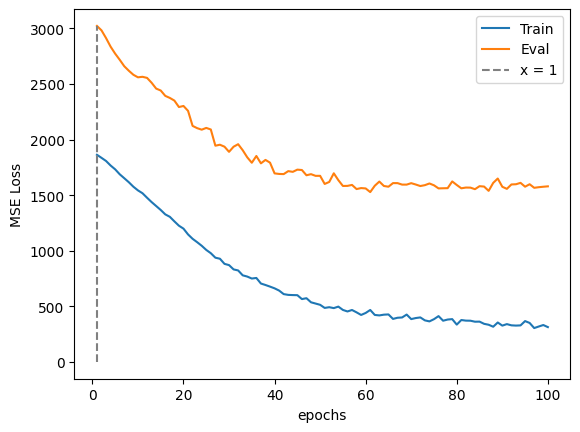

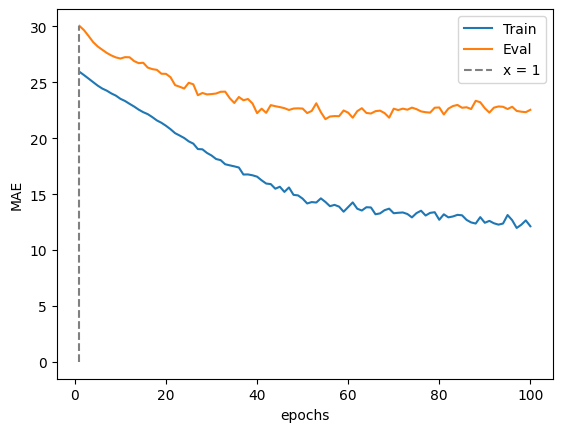

Epoch 001: | Train Loss: 1904.58772 | Val Loss: 4984.85046 | Train Acc: 26.190| Val Acc: 31.617
Epoch 002: | Train Loss: 1880.02051 | Val Loss: 4951.22791 | Train Acc: 25.917| Val Acc: 31.371
Epoch 003: | Train Loss: 1844.12701 | Val Loss: 4896.38049 | Train Acc: 25.600| Val Acc: 30.890
Epoch 004: | Train Loss: 1803.84589 | Val Loss: 4826.28418 | Train Acc: 25.265| Val Acc: 30.420
Epoch 005: | Train Loss: 1762.15869 | Val Loss: 4772.79175 | Train Acc: 24.988| Val Acc: 30.113
Epoch 006: | Train Loss: 1721.81744 | Val Loss: 4730.90674 | Train Acc: 24.732| Val Acc: 29.924
Epoch 007: | Train Loss: 1687.06307 | Val Loss: 4692.18872 | Train Acc: 24.523| Val Acc: 29.724
Epoch 008: | Train Loss: 1647.06419 | Val Loss: 4666.55713 | Train Acc: 24.275| Val Acc: 29.576
Epoch 009: | Train Loss: 1611.43185 | Val Loss: 4685.04517 | Train Acc: 24.124| Val Acc: 29.717
Epoch 010: | Train Loss: 1573.30259 | Val Loss: 4654.23792 | Train Acc: 23.790| Val Acc: 29.453
Epoch 011: | Train Loss: 1532.57404 | Va

Epoch 087: | Train Loss: 338.21407 | Val Loss: 3339.74609 | Train Acc: 12.927| Val Acc: 24.377
Epoch 088: | Train Loss: 353.87428 | Val Loss: 3306.99292 | Train Acc: 13.048| Val Acc: 24.361
Epoch 089: | Train Loss: 325.66571 | Val Loss: 3262.54871 | Train Acc: 12.682| Val Acc: 24.293
Epoch 090: | Train Loss: 359.29271 | Val Loss: 3370.24792 | Train Acc: 13.166| Val Acc: 24.595
Epoch 091: | Train Loss: 334.64427 | Val Loss: 3324.06348 | Train Acc: 12.807| Val Acc: 24.568
Epoch 092: | Train Loss: 343.82650 | Val Loss: 3363.39575 | Train Acc: 12.778| Val Acc: 24.725
Epoch 093: | Train Loss: 332.34558 | Val Loss: 3362.04651 | Train Acc: 12.860| Val Acc: 24.496
Epoch 094: | Train Loss: 325.55322 | Val Loss: 3349.93835 | Train Acc: 12.589| Val Acc: 24.498
Epoch 095: | Train Loss: 351.50599 | Val Loss: 3359.00220 | Train Acc: 12.822| Val Acc: 24.513
Epoch 096: | Train Loss: 330.43524 | Val Loss: 3308.60938 | Train Acc: 12.745| Val Acc: 24.762
Epoch 097: | Train Loss: 309.35805 | Val Loss: 340

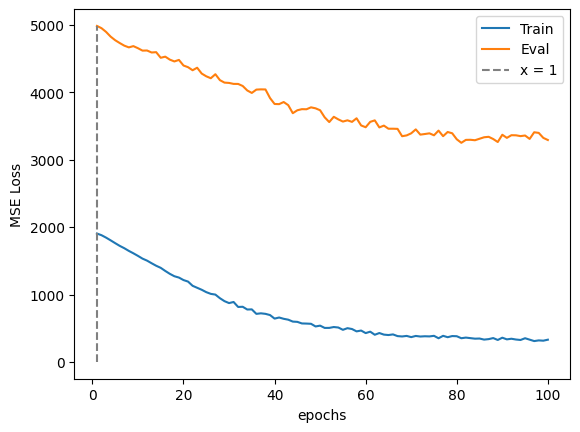

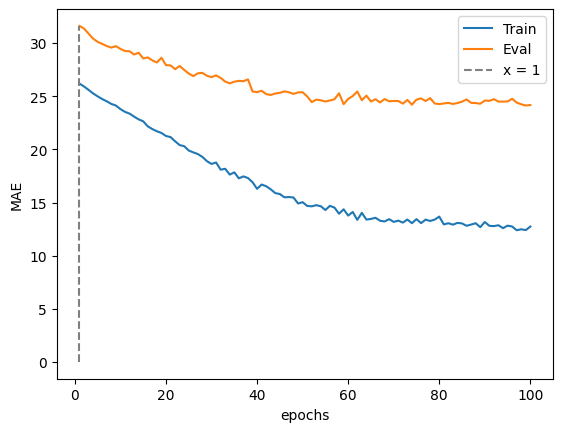

Epoch 001: | Train Loss: 1904.06529 | Val Loss: 6839.63452 | Train Acc: 26.046| Val Acc: 34.727
Epoch 002: | Train Loss: 1878.45267 | Val Loss: 6788.44580 | Train Acc: 25.783| Val Acc: 34.253
Epoch 003: | Train Loss: 1846.60193 | Val Loss: 6715.31592 | Train Acc: 25.507| Val Acc: 33.679
Epoch 004: | Train Loss: 1807.77109 | Val Loss: 6628.88452 | Train Acc: 25.159| Val Acc: 33.026
Epoch 005: | Train Loss: 1764.98742 | Val Loss: 6552.32373 | Train Acc: 24.812| Val Acc: 32.523
Epoch 006: | Train Loss: 1729.88815 | Val Loss: 6507.41895 | Train Acc: 24.610| Val Acc: 32.321
Epoch 007: | Train Loss: 1690.73968 | Val Loss: 6482.03247 | Train Acc: 24.342| Val Acc: 32.260
Epoch 008: | Train Loss: 1649.64911 | Val Loss: 6450.13403 | Train Acc: 24.119| Val Acc: 32.201
Epoch 009: | Train Loss: 1620.53539 | Val Loss: 6380.74805 | Train Acc: 23.891| Val Acc: 31.962
Epoch 010: | Train Loss: 1583.08375 | Val Loss: 6277.43018 | Train Acc: 23.744| Val Acc: 31.448
Epoch 011: | Train Loss: 1546.73473 | Va

Epoch 088: | Train Loss: 335.89406 | Val Loss: 4763.01270 | Train Acc: 12.613| Val Acc: 27.449
Epoch 089: | Train Loss: 318.22969 | Val Loss: 4708.42749 | Train Acc: 12.197| Val Acc: 27.306
Epoch 090: | Train Loss: 346.89631 | Val Loss: 4756.39819 | Train Acc: 12.697| Val Acc: 27.239
Epoch 091: | Train Loss: 318.39280 | Val Loss: 4784.39478 | Train Acc: 12.298| Val Acc: 27.046
Epoch 092: | Train Loss: 325.90276 | Val Loss: 4753.76636 | Train Acc: 12.378| Val Acc: 27.540
Epoch 093: | Train Loss: 331.32215 | Val Loss: 4760.38647 | Train Acc: 12.417| Val Acc: 27.820
Epoch 094: | Train Loss: 321.42025 | Val Loss: 4737.38696 | Train Acc: 12.341| Val Acc: 27.006
Epoch 095: | Train Loss: 298.05102 | Val Loss: 4766.10474 | Train Acc: 11.977| Val Acc: 27.282
Epoch 096: | Train Loss: 332.71866 | Val Loss: 4692.89648 | Train Acc: 12.528| Val Acc: 27.314
Epoch 097: | Train Loss: 314.99097 | Val Loss: 4805.96362 | Train Acc: 12.464| Val Acc: 27.794
Epoch 098: | Train Loss: 314.25117 | Val Loss: 482

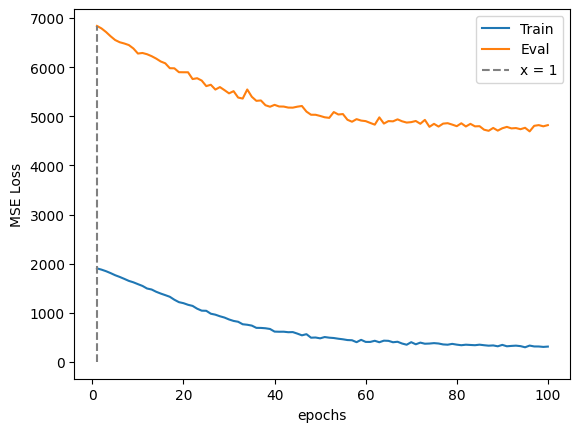

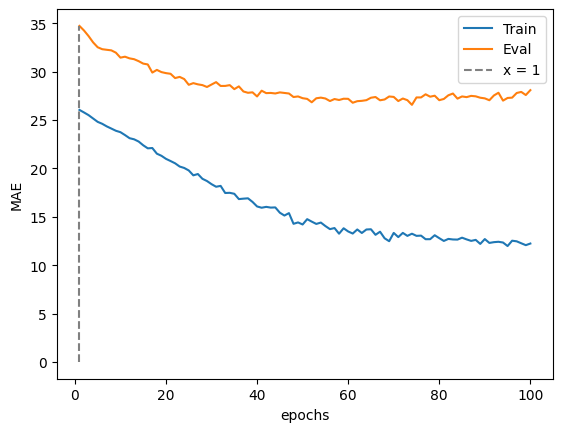

Epoch 001: | Train Loss: 1924.71405 | Val Loss: 2447.50854 | Train Acc: 26.116| Val Acc: 28.299
Epoch 002: | Train Loss: 1901.23860 | Val Loss: 2415.21497 | Train Acc: 25.859| Val Acc: 27.931
Epoch 003: | Train Loss: 1870.31259 | Val Loss: 2356.76062 | Train Acc: 25.579| Val Acc: 27.282
Epoch 004: | Train Loss: 1832.41359 | Val Loss: 2286.89453 | Train Acc: 25.245| Val Acc: 26.560
Epoch 005: | Train Loss: 1793.74769 | Val Loss: 2225.36182 | Train Acc: 24.977| Val Acc: 26.030
Epoch 006: | Train Loss: 1749.60029 | Val Loss: 2173.26672 | Train Acc: 24.667| Val Acc: 25.661
Epoch 007: | Train Loss: 1707.55987 | Val Loss: 2123.51868 | Train Acc: 24.421| Val Acc: 25.310
Epoch 008: | Train Loss: 1677.39286 | Val Loss: 2089.66296 | Train Acc: 24.227| Val Acc: 25.059
Epoch 009: | Train Loss: 1643.24582 | Val Loss: 2079.45801 | Train Acc: 24.030| Val Acc: 25.050
Epoch 010: | Train Loss: 1592.50690 | Val Loss: 2037.96533 | Train Acc: 23.761| Val Acc: 25.015
Epoch 011: | Train Loss: 1561.85490 | Va

Epoch 087: | Train Loss: 357.62528 | Val Loss: 1273.52020 | Train Acc: 13.126| Val Acc: 20.530
Epoch 088: | Train Loss: 357.41860 | Val Loss: 1250.87097 | Train Acc: 13.064| Val Acc: 20.268
Epoch 089: | Train Loss: 337.41379 | Val Loss: 1220.74817 | Train Acc: 12.734| Val Acc: 20.146
Epoch 090: | Train Loss: 337.41317 | Val Loss: 1243.52612 | Train Acc: 12.907| Val Acc: 20.541
Epoch 091: | Train Loss: 338.55547 | Val Loss: 1284.60431 | Train Acc: 12.903| Val Acc: 20.640
Epoch 092: | Train Loss: 352.37266 | Val Loss: 1271.42010 | Train Acc: 12.908| Val Acc: 20.629
Epoch 093: | Train Loss: 328.23417 | Val Loss: 1223.01074 | Train Acc: 12.565| Val Acc: 20.277
Epoch 094: | Train Loss: 357.47432 | Val Loss: 1249.19263 | Train Acc: 12.920| Val Acc: 20.591
Epoch 095: | Train Loss: 335.12826 | Val Loss: 1226.97418 | Train Acc: 12.728| Val Acc: 20.145
Epoch 096: | Train Loss: 340.87493 | Val Loss: 1239.95728 | Train Acc: 12.833| Val Acc: 20.347
Epoch 097: | Train Loss: 348.72661 | Val Loss: 124

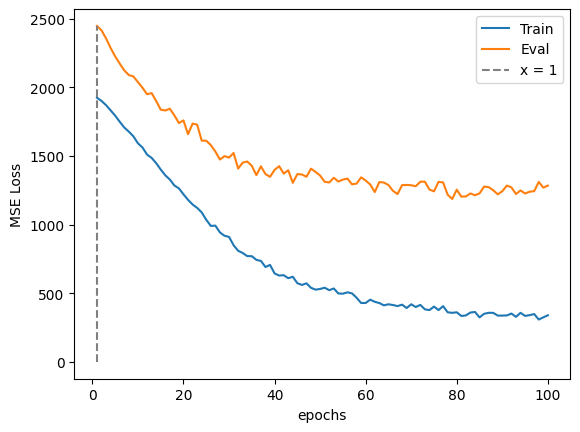

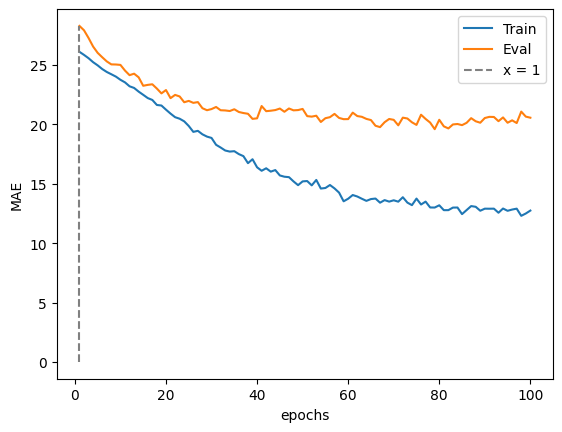

MAE on train set:  10.361917699666044
min prediction: 3
max prediction: 158

MAE on test set:  26.257259296994395
Error <= 30: 78.25 %
min prediction: 3
max prediction: 146


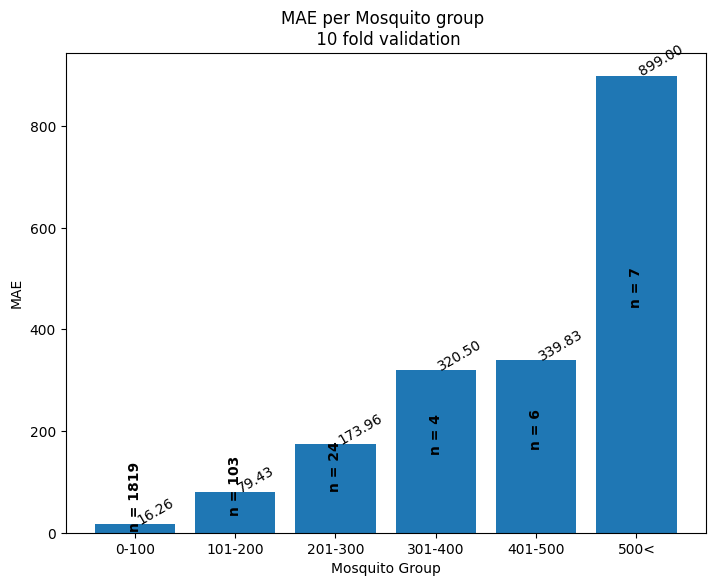

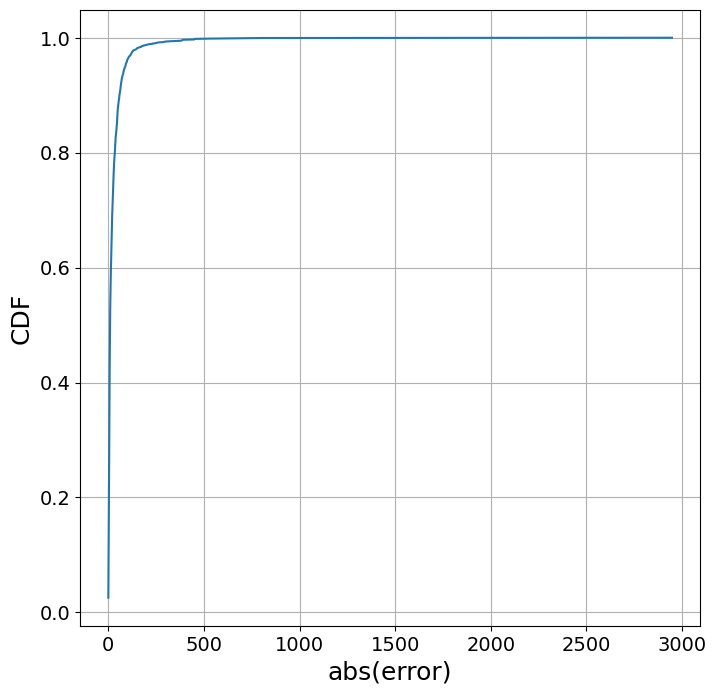

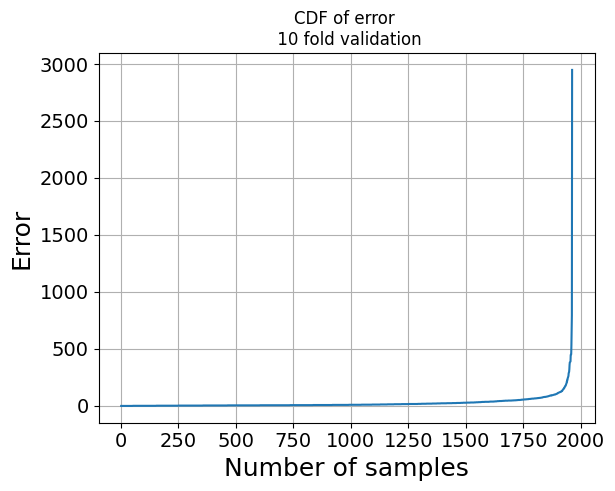

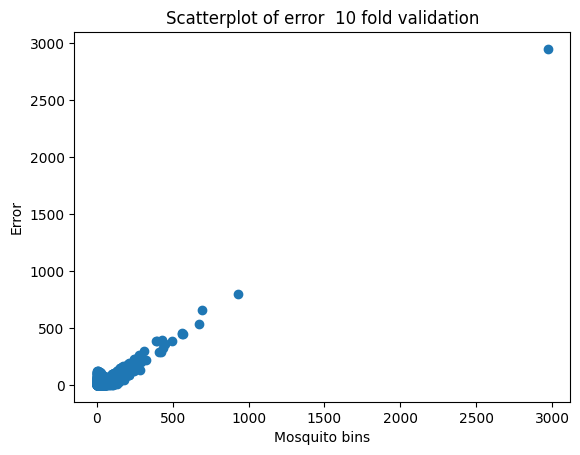

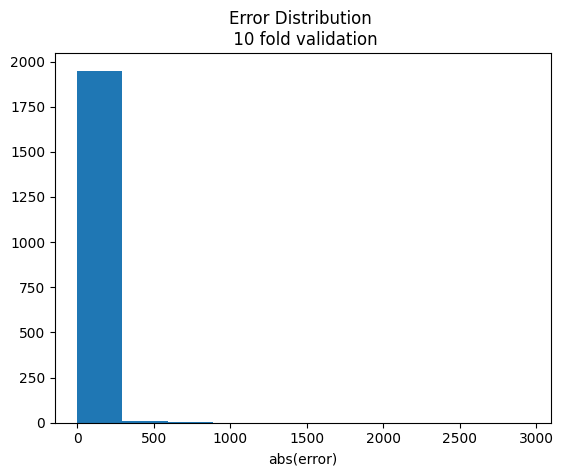

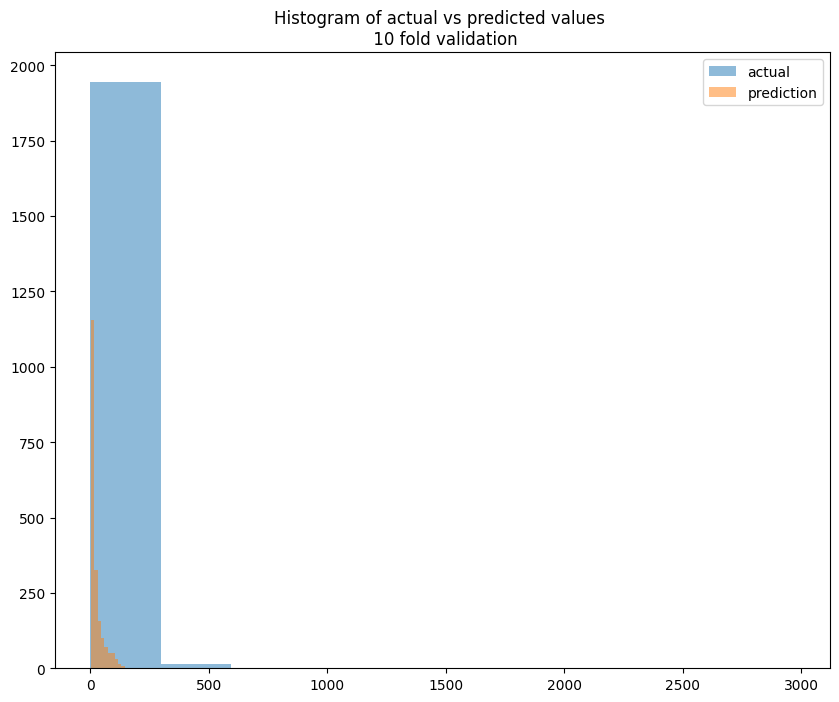

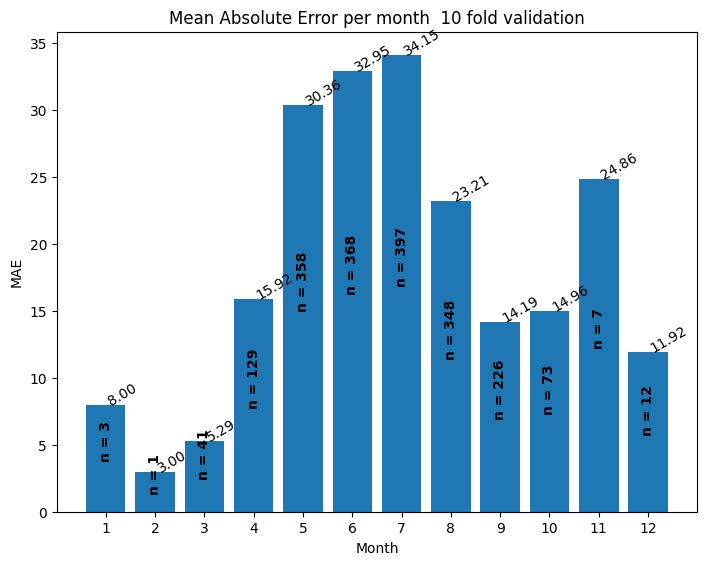

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 1836.13822 | Val Loss: 1916.06409 | Train Acc: 25.083| Val Acc: 28.960
Epoch 002: | Train Loss: 1803.64306 | Val Loss: 1925.64001 | Train Acc: 24.793| Val Acc: 28.960
Epoch 003: | Train Loss: 1769.37926 | Val Loss: 1920.86572 | Train Acc: 24.504| Val Acc: 28.720
Epoch 004: | Train Loss: 1729.90134 | Val Loss: 1910.55310 | Train Acc: 24.118| Val Acc: 28.280
Epoch 005: | Train Loss: 1690.54031 | Val Loss: 1883.00037 | Train Acc: 23.852| Val Acc: 27.560
Epoch 006: | Train Loss: 1654.52832 | Val Loss: 1822.90137 | Train Acc: 23.617| Val Acc: 26.760
Epoch 007: | Train Loss: 1623.26943 | Val Loss: 1801.46716 | Train Acc: 23.402| Val Acc: 26.680
Epoch 008: | Train Loss: 1579.61358 | Val Loss: 1765.81470 | Train Acc: 23.145| Val Acc: 26.400
Epoch 009: | Train Loss: 1548.14337 | Val Loss: 1747.36560 | Train Acc: 22.942| Val Acc: 25.960
Epoch 010: | Train Loss: 1507.23438 | Val Loss: 1658.10901 | Train Acc: 22.688| Val Acc: 24.840
Epoch 011: | Train Loss: 1476.34349 | Va

Epoch 087: | Train Loss: 369.57044 | Val Loss: 1636.97302 | Train Acc: 13.027| Val Acc: 26.120
Epoch 088: | Train Loss: 337.93629 | Val Loss: 1614.20972 | Train Acc: 12.444| Val Acc: 25.960
Epoch 089: | Train Loss: 363.41191 | Val Loss: 1605.89026 | Train Acc: 12.862| Val Acc: 25.880
Epoch 090: | Train Loss: 373.94167 | Val Loss: 1614.38281 | Train Acc: 12.874| Val Acc: 25.920
Epoch 091: | Train Loss: 336.69466 | Val Loss: 1582.70740 | Train Acc: 12.305| Val Acc: 25.160
Epoch 092: | Train Loss: 352.73649 | Val Loss: 1638.59924 | Train Acc: 12.604| Val Acc: 26.400
Epoch 093: | Train Loss: 356.27960 | Val Loss: 1603.37354 | Train Acc: 12.714| Val Acc: 25.640
Epoch 094: | Train Loss: 330.76172 | Val Loss: 1633.05359 | Train Acc: 12.302| Val Acc: 26.400
Epoch 095: | Train Loss: 336.31488 | Val Loss: 1608.41052 | Train Acc: 12.341| Val Acc: 25.480
Epoch 096: | Train Loss: 330.48849 | Val Loss: 1631.58313 | Train Acc: 12.312| Val Acc: 25.880
Epoch 097: | Train Loss: 329.85050 | Val Loss: 161

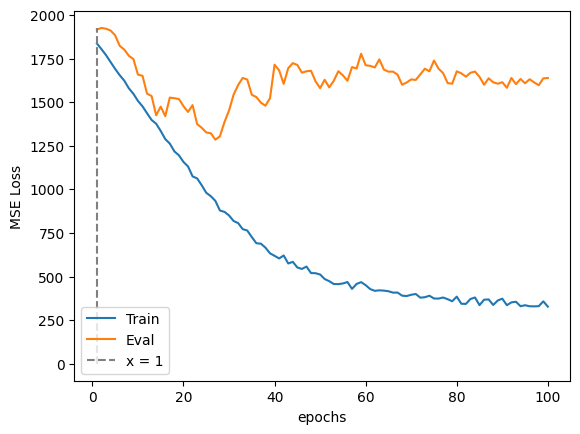

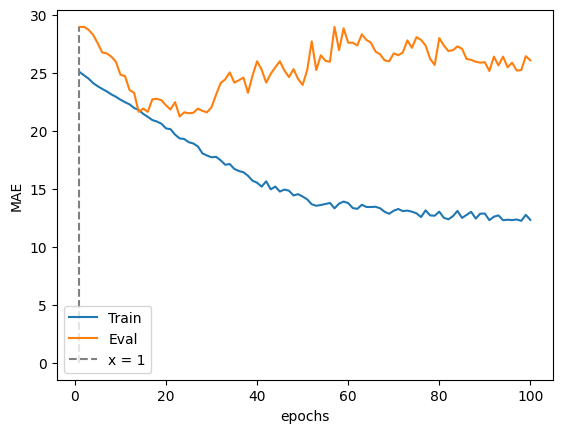

Epoch 001: | Train Loss: 471.65879 | Val Loss: 2858.04102 | Train Acc: 14.220| Val Acc: 38.882
Epoch 002: | Train Loss: 458.16582 | Val Loss: 2689.07593 | Train Acc: 14.334| Val Acc: 37.706
Epoch 003: | Train Loss: 419.92303 | Val Loss: 2649.03101 | Train Acc: 13.900| Val Acc: 37.353
Epoch 004: | Train Loss: 449.82539 | Val Loss: 2708.43311 | Train Acc: 14.384| Val Acc: 38.676
Epoch 005: | Train Loss: 405.85963 | Val Loss: 2692.40063 | Train Acc: 13.693| Val Acc: 36.471
Epoch 006: | Train Loss: 430.20209 | Val Loss: 3279.78198 | Train Acc: 14.005| Val Acc: 36.971
Epoch 007: | Train Loss: 397.99023 | Val Loss: 3229.00806 | Train Acc: 13.462| Val Acc: 37.397
Epoch 008: | Train Loss: 417.49265 | Val Loss: 3093.49048 | Train Acc: 13.479| Val Acc: 36.544
Epoch 009: | Train Loss: 394.96618 | Val Loss: 2920.38867 | Train Acc: 13.494| Val Acc: 36.574
Epoch 010: | Train Loss: 375.81010 | Val Loss: 2708.87964 | Train Acc: 13.057| Val Acc: 36.088
Epoch 011: | Train Loss: 368.89299 | Val Loss: 263

Epoch 089: | Train Loss: 239.83512 | Val Loss: 3577.61133 | Train Acc: 10.623| Val Acc: 38.279
Epoch 090: | Train Loss: 246.79702 | Val Loss: 3575.97852 | Train Acc: 10.706| Val Acc: 38.279
Epoch 091: | Train Loss: 241.35186 | Val Loss: 3655.50659 | Train Acc: 10.726| Val Acc: 38.691
Epoch 092: | Train Loss: 252.54830 | Val Loss: 3646.72656 | Train Acc: 10.899| Val Acc: 38.985
Epoch 093: | Train Loss: 242.52571 | Val Loss: 3364.27734 | Train Acc: 10.934| Val Acc: 36.838
Epoch 094: | Train Loss: 241.91040 | Val Loss: 3312.07324 | Train Acc: 10.645| Val Acc: 36.456
Epoch 095: | Train Loss: 235.33903 | Val Loss: 3293.33228 | Train Acc: 10.672| Val Acc: 36.676
Epoch 096: | Train Loss: 235.21186 | Val Loss: 3375.73242 | Train Acc: 10.610| Val Acc: 37.206
Epoch 097: | Train Loss: 247.62529 | Val Loss: 3345.21729 | Train Acc: 10.999| Val Acc: 37.015
Epoch 098: | Train Loss: 246.38314 | Val Loss: 3443.08887 | Train Acc: 10.722| Val Acc: 37.603
Epoch 099: | Train Loss: 244.34715 | Val Loss: 343

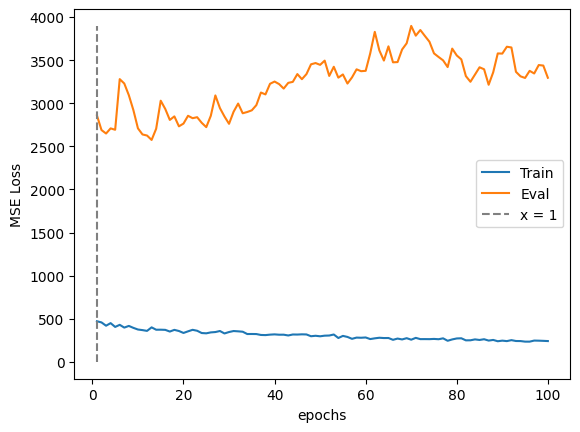

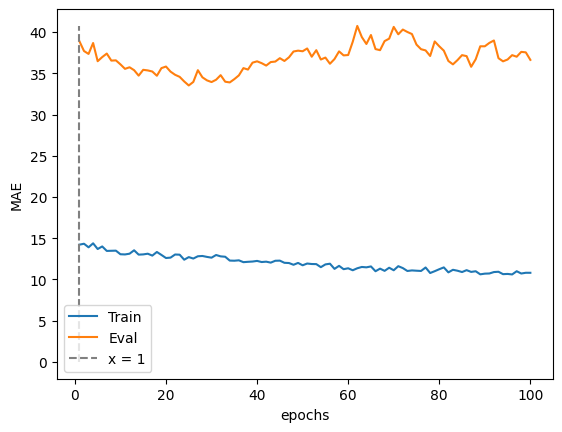

Epoch 001: | Train Loss: 366.37467 | Val Loss: 109247.70312 | Train Acc: 12.834| Val Acc: 61.457
Epoch 002: | Train Loss: 364.91768 | Val Loss: 108872.38281 | Train Acc: 12.705| Val Acc: 62.654
Epoch 003: | Train Loss: 347.00907 | Val Loss: 108746.92969 | Train Acc: 12.323| Val Acc: 63.037
Epoch 004: | Train Loss: 319.26884 | Val Loss: 108746.82812 | Train Acc: 11.984| Val Acc: 62.654
Epoch 005: | Train Loss: 330.09395 | Val Loss: 108878.70312 | Train Acc: 12.355| Val Acc: 62.222
Epoch 006: | Train Loss: 323.76130 | Val Loss: 108952.04688 | Train Acc: 12.005| Val Acc: 62.062
Epoch 007: | Train Loss: 314.07344 | Val Loss: 108726.50781 | Train Acc: 11.966| Val Acc: 60.568
Epoch 008: | Train Loss: 288.65307 | Val Loss: 108384.44531 | Train Acc: 11.673| Val Acc: 61.531
Epoch 009: | Train Loss: 293.57541 | Val Loss: 108372.91406 | Train Acc: 11.764| Val Acc: 62.716
Epoch 010: | Train Loss: 278.90873 | Val Loss: 108910.54688 | Train Acc: 11.399| Val Acc: 63.963
Epoch 011: | Train Loss: 304.5

Epoch 087: | Train Loss: 194.19667 | Val Loss: 109019.66406 | Train Acc: 9.739| Val Acc: 64.099
Epoch 088: | Train Loss: 207.05026 | Val Loss: 109041.80469 | Train Acc: 9.783| Val Acc: 61.914
Epoch 089: | Train Loss: 206.70174 | Val Loss: 108985.53125 | Train Acc: 10.083| Val Acc: 59.679
Epoch 090: | Train Loss: 214.50815 | Val Loss: 108355.49219 | Train Acc: 10.219| Val Acc: 61.210
Epoch 091: | Train Loss: 196.98855 | Val Loss: 108842.72656 | Train Acc: 9.648| Val Acc: 60.988
Epoch 092: | Train Loss: 198.97767 | Val Loss: 109230.83594 | Train Acc: 9.769| Val Acc: 60.728
Epoch 093: | Train Loss: 193.53660 | Val Loss: 109249.82812 | Train Acc: 9.585| Val Acc: 60.963
Epoch 094: | Train Loss: 205.01027 | Val Loss: 109154.82812 | Train Acc: 9.771| Val Acc: 61.432
Epoch 095: | Train Loss: 195.50065 | Val Loss: 109269.29688 | Train Acc: 9.557| Val Acc: 62.395
Epoch 096: | Train Loss: 200.87495 | Val Loss: 109592.25000 | Train Acc: 9.650| Val Acc: 61.753
Epoch 097: | Train Loss: 195.01163 | V

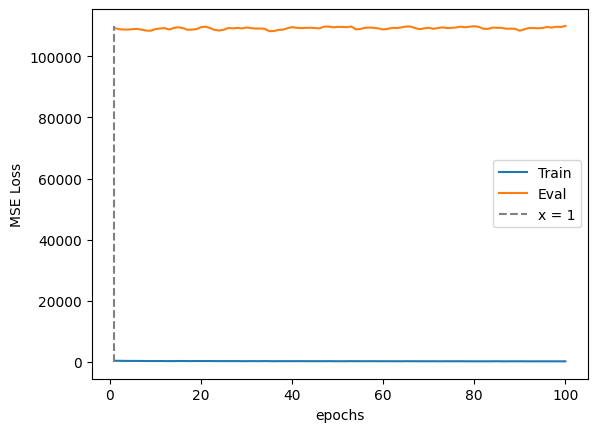

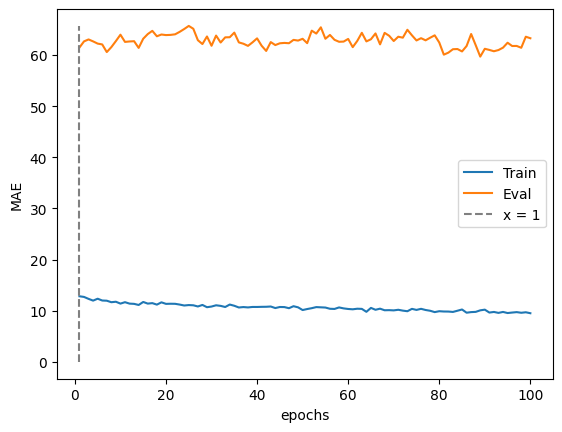

Epoch 001: | Train Loss: 345.08448 | Val Loss: 2368.88379 | Train Acc: 12.200| Val Acc: 34.269
Epoch 002: | Train Loss: 285.72515 | Val Loss: 2321.13330 | Train Acc: 11.305| Val Acc: 32.987
Epoch 003: | Train Loss: 292.48230 | Val Loss: 2194.57764 | Train Acc: 11.147| Val Acc: 30.949
Epoch 004: | Train Loss: 281.01547 | Val Loss: 2318.48438 | Train Acc: 11.378| Val Acc: 33.705
Epoch 005: | Train Loss: 292.64409 | Val Loss: 2336.52686 | Train Acc: 11.383| Val Acc: 34.487
Epoch 006: | Train Loss: 265.31863 | Val Loss: 2156.78076 | Train Acc: 10.936| Val Acc: 31.795
Epoch 007: | Train Loss: 281.80962 | Val Loss: 2197.42847 | Train Acc: 11.281| Val Acc: 32.462
Epoch 008: | Train Loss: 279.78437 | Val Loss: 2223.81519 | Train Acc: 11.334| Val Acc: 33.000
Epoch 009: | Train Loss: 276.94737 | Val Loss: 2162.81079 | Train Acc: 11.211| Val Acc: 31.910
Epoch 010: | Train Loss: 266.75752 | Val Loss: 2127.10181 | Train Acc: 10.863| Val Acc: 31.577
Epoch 011: | Train Loss: 260.76935 | Val Loss: 219

Epoch 089: | Train Loss: 158.98704 | Val Loss: 2127.08740 | Train Acc: 8.977| Val Acc: 32.013
Epoch 090: | Train Loss: 179.35373 | Val Loss: 2163.54883 | Train Acc: 9.267| Val Acc: 31.397
Epoch 091: | Train Loss: 184.19648 | Val Loss: 2071.25610 | Train Acc: 9.389| Val Acc: 31.179
Epoch 092: | Train Loss: 179.61256 | Val Loss: 2114.80444 | Train Acc: 9.337| Val Acc: 31.859
Epoch 093: | Train Loss: 166.14814 | Val Loss: 2058.69336 | Train Acc: 9.012| Val Acc: 30.577
Epoch 094: | Train Loss: 177.94125 | Val Loss: 2175.67822 | Train Acc: 9.409| Val Acc: 32.308
Epoch 095: | Train Loss: 168.78310 | Val Loss: 2066.76050 | Train Acc: 9.184| Val Acc: 29.667
Epoch 096: | Train Loss: 161.50157 | Val Loss: 2124.25854 | Train Acc: 8.848| Val Acc: 30.218
Epoch 097: | Train Loss: 171.99749 | Val Loss: 2108.01050 | Train Acc: 9.212| Val Acc: 30.782
Epoch 098: | Train Loss: 184.13771 | Val Loss: 2191.38232 | Train Acc: 9.438| Val Acc: 31.897
Epoch 099: | Train Loss: 166.23941 | Val Loss: 2139.36670 | 

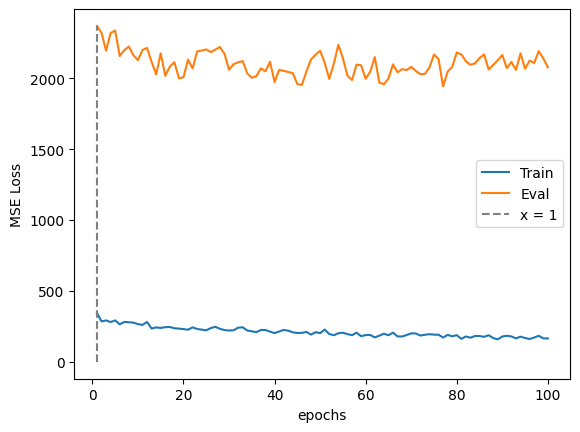

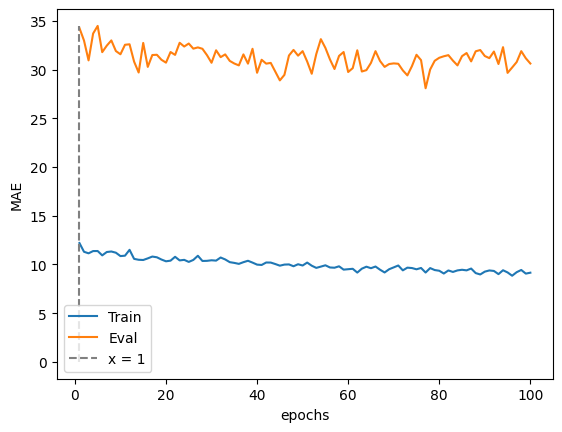

Epoch 001: | Train Loss: 287.67242 | Val Loss: 528.11823 | Train Acc: 11.136| Val Acc: 14.077
Epoch 002: | Train Loss: 313.21890 | Val Loss: 437.43610 | Train Acc: 11.474| Val Acc: 13.615
Epoch 003: | Train Loss: 264.75615 | Val Loss: 374.10202 | Train Acc: 10.721| Val Acc: 13.462
Epoch 004: | Train Loss: 258.00454 | Val Loss: 292.70944 | Train Acc: 10.863| Val Acc: 12.154
Epoch 005: | Train Loss: 248.18763 | Val Loss: 243.37997 | Train Acc: 10.443| Val Acc: 11.385
Epoch 006: | Train Loss: 246.15973 | Val Loss: 243.68541 | Train Acc: 10.498| Val Acc: 11.615
Epoch 007: | Train Loss: 262.88183 | Val Loss: 223.29988 | Train Acc: 10.836| Val Acc: 11.154
Epoch 008: | Train Loss: 230.68321 | Val Loss: 207.91951 | Train Acc: 10.324| Val Acc: 10.846
Epoch 009: | Train Loss: 250.45736 | Val Loss: 217.84935 | Train Acc: 10.462| Val Acc: 10.615
Epoch 010: | Train Loss: 226.99135 | Val Loss: 237.82812 | Train Acc: 10.196| Val Acc: 11.000
Epoch 011: | Train Loss: 251.89302 | Val Loss: 184.46796 | T

Epoch 091: | Train Loss: 155.39525 | Val Loss: 202.33633 | Train Acc: 8.772| Val Acc: 10.462
Epoch 092: | Train Loss: 148.77666 | Val Loss: 210.91905 | Train Acc: 8.569| Val Acc: 10.000
Epoch 093: | Train Loss: 147.80728 | Val Loss: 207.96217 | Train Acc: 8.666| Val Acc: 9.769
Epoch 094: | Train Loss: 154.22655 | Val Loss: 250.93221 | Train Acc: 8.767| Val Acc: 10.692
Epoch 095: | Train Loss: 154.23282 | Val Loss: 239.94852 | Train Acc: 8.513| Val Acc: 10.538
Epoch 096: | Train Loss: 153.78274 | Val Loss: 233.74831 | Train Acc: 8.672| Val Acc: 10.462
Epoch 097: | Train Loss: 159.06384 | Val Loss: 202.47217 | Train Acc: 8.801| Val Acc: 9.846
Epoch 098: | Train Loss: 145.82430 | Val Loss: 182.20651 | Train Acc: 8.393| Val Acc: 9.462
Epoch 099: | Train Loss: 150.74625 | Val Loss: 196.75119 | Train Acc: 8.552| Val Acc: 9.769
Epoch 100: | Train Loss: 138.02639 | Val Loss: 207.00522 | Train Acc: 8.289| Val Acc: 9.769


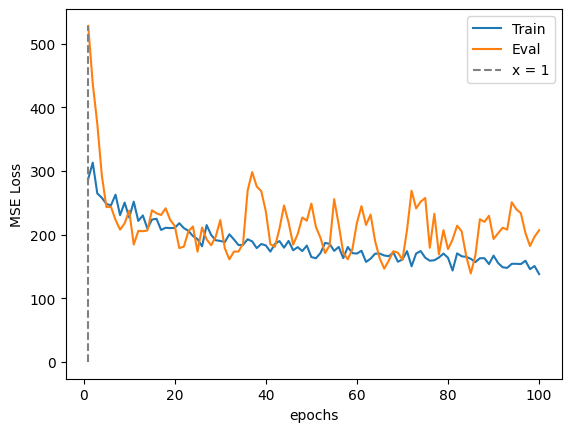

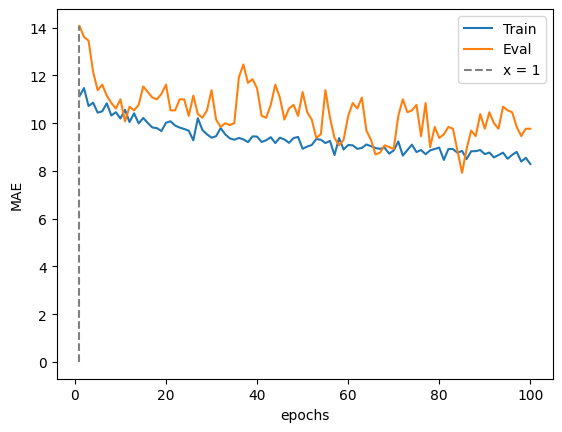

MAE on train set:  7.523466902811601
min prediction: 1
max prediction: 152

MAE on test set:  40.69433962264151
Error <= 30: 67.17 %
min prediction: 2
max prediction: 125


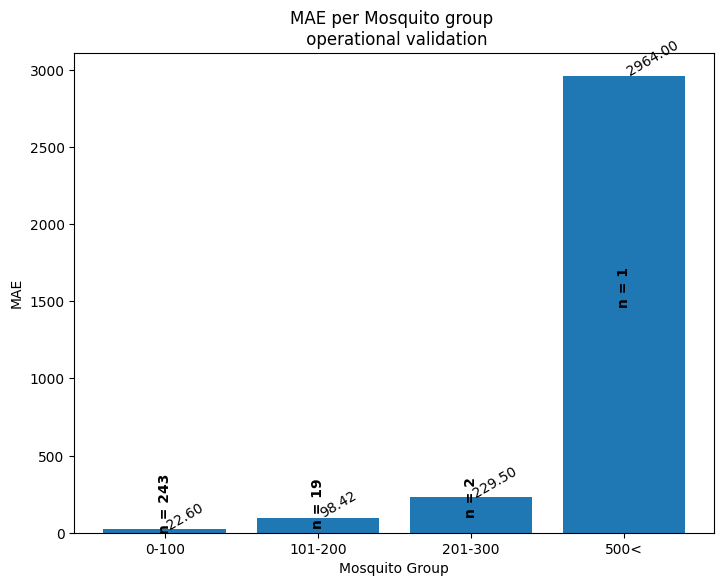

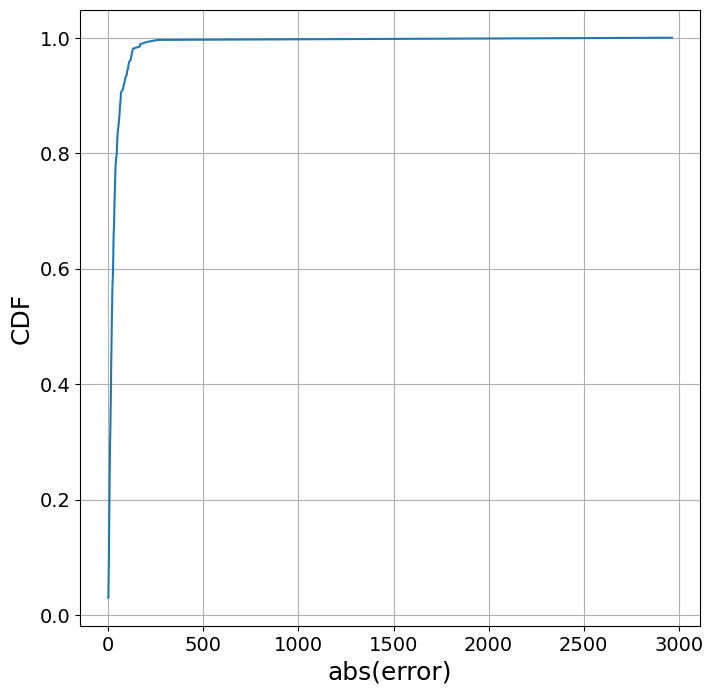

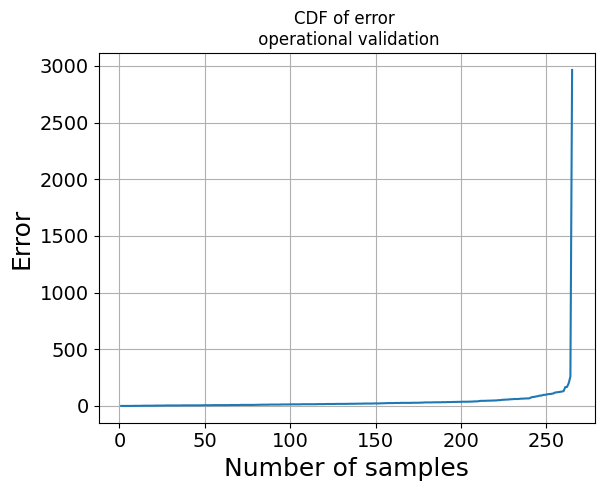

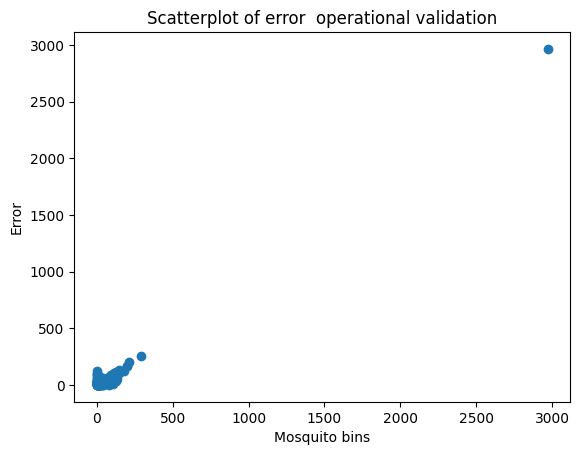

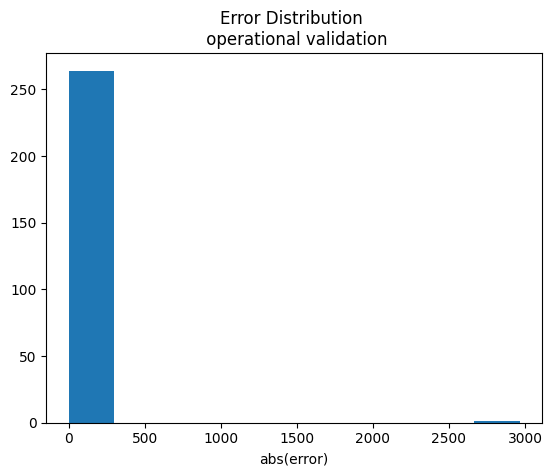

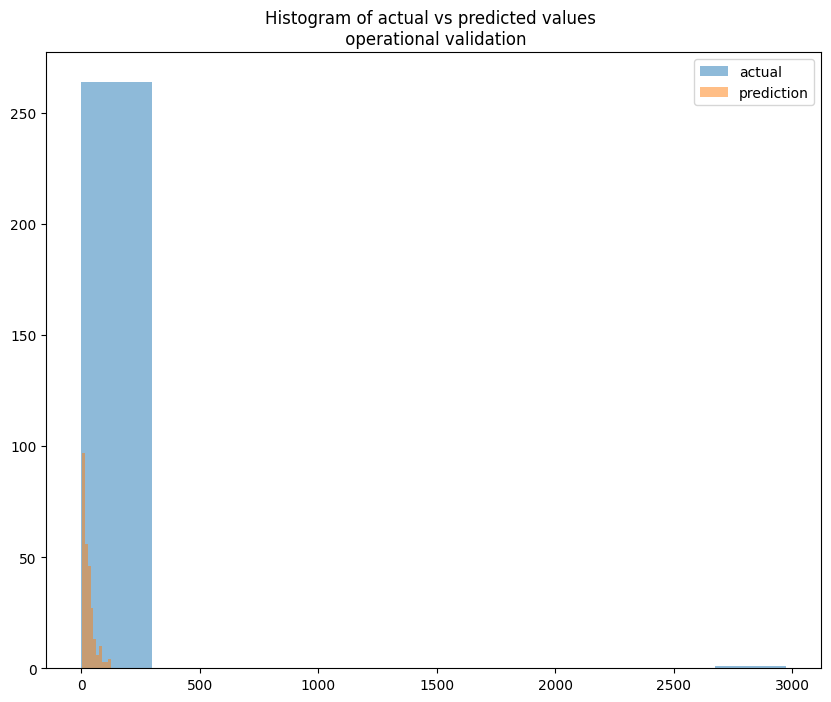

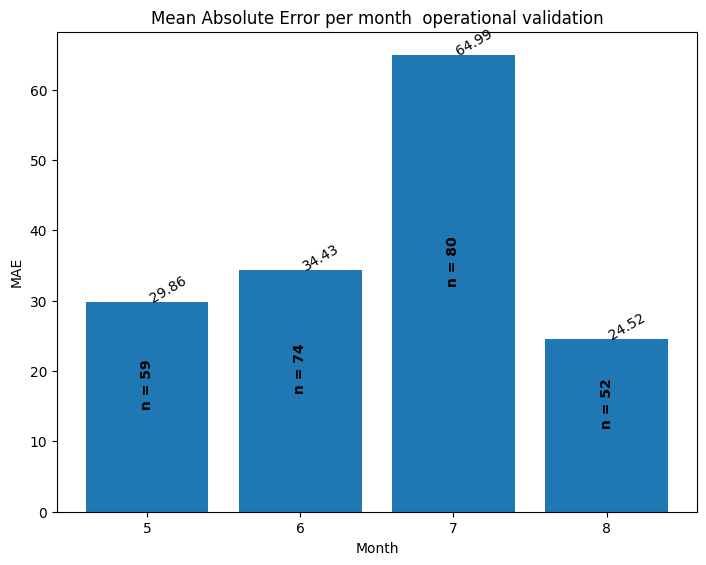

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)